<a href="https://colab.research.google.com/github/HeinThuAung-11/FlowerReco/blob/master/Flower_Recognition_with_CNN_and_Transfer_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = ':https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F8782%2F2431805%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240911%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240911T130909Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D06fc133f5758bdf867a77dfc2fbe00e052f3240fdfa193d198b22e4e0e7dd1288b1f67cd1d9594bcfee028fe18f8cd047d366fc2cd0878f825dbb13fe1ac78a95974bd17437ad1d9d914d4bd591da2c682cc34eea6ff5a8973e52c04c80e43577722c0fafb80370f63020f979c74e711aebf19dec16e4333f917ad932fd8793d1a524944967ba83bfbf314d4641633d1a0ff5c8d299d11a4f338727d77c69c7ce0ff8ffc5a32f9fa10cfe661377b1dab372a9e183b3437e11ca691cd32ba6f65c106e9b8d5462f4e2b570e9fdf9dde24d3961642b6e3b8c88a5b71b266bda0361bf6697f48a6cf22d564c61d8a3998f19ab40c145d0f41a5fbfc66e16e75c3c2'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 235663188 bytes downloaded
Downloaded and uncompressed: 
Data source import complete.


# Welcome to Flower Recognition with CNN and Transfer Learning Models 🌼🌿

## Introduction 🌟

Welcome to the "Flower Recognition Project." This project focuses on predicting the class types of flowers using convolutional neural networks (CNN) and transfer learning models such as MobileNetV2 and Xception. The goal is to leverage these models to accurately classify different types of flowers based on their features and characteristics.

## Project Goals 🎯

- Utilize CNN architecture for flower classification.
- Implement transfer learning using pre-trained models (MobileNetV2, Xception).
- Train and evaluate models for accurate prediction of flower classes.
- Compare the performance of CNN and transfer learning models.

## Project Outline 📝

### 1. Introduction
   - Overview of the project goals and objectives.
   - Explanation of CNN and transfer learning concepts for flower recognition.

### 2. Dataset Overview 📊
   - Description of the flower recognition dataset.
   - Details about the classes/types of flowers included in the dataset.

### 3. Data Preprocessing 🛠️
   - Data loading and preprocessing steps.
   - Image pipelining, how to use

### 4. CNN Model 🤖
   - Architecture of the CNN model for flower classification.
   - Training, validation, and testing procedures.

### 5. Transfer Learning Models 🚀
   - Introduction to transfer learning with MobileNetV2 and Xception.
   - Fine-tuning and training transfer learning models for flower recognition.

### 6. Model Evaluation 📊
   - Performance metrics for model evaluation (accuracy, precision, recall, etc.).
   - Comparison of CNN and transfer learning models.

### 7. Results and Analysis 📈
   - Interpretation of model performance results.
   - Insights gained from comparing different models.

### 8. Conclusion 🌟
   - Summary of key findings and outcomes.
   - Future steps for model improvement or deployment.

## Tools and Technologies 💻

- Python programming language.
- TensorFlow and Keras for model development.
- Matplotlib and Seaborn for data visualization.
- Kaggle Notebook for code execution and documentation.
- Kaggle Accelerator P100


# CONTENT

# 1. IMPORTINGS

In [ ]:
import os
import pandas as pd
import tensorflow as tf
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.image import imread

# 2. READ IMAGES

In [ ]:
path = "/kaggle/input/flowers"

In [ ]:
os.listdir(path)

['dandelion', 'rose', 'daisy', 'tulip', 'sunflower']

In [ ]:
os.listdir(path+'/tulip')[:10]

['7166539842_43b7e02883_n.jpg',
 '6948277038_89d7ff42e2_m.jpg',
 '7166632158_666116d770_n.jpg',
 '14093884601_c87b5cd663_n.jpg',
 '7042692841_f323799c0d.jpg',
 '16732302779_8aa56f255d_n.jpg',
 '5718511402_c20cb11cef_n.jpg',
 '5680695867_baff72fc7c.jpg',
 '13997641965_80d5dab542_n.jpg',
 '5718512292_aa50a9a473_n.jpg']

In [ ]:
class_names = ['daisy','dandelion',  'rose', 'sunflower', 'tulip']

In [ ]:
input_shape = (256,256)

In [ ]:
for flower_class in class_names:
    class_path = os.path.join(path, flower_class)
    max_values = []
    min_values = []
    for image in os.listdir(class_path):
        img = imread(os.path.join(class_path, image))
        max_val = img.max()
        min_val = img.min()
        max_values.append(max_val)
        min_values.append(min_val)
    max_class_val = max(max_values)
    min_class_val = min(min_values)
    print("***************************")
    print(f"Class: {flower_class}")
    print(f"Max value: {max_class_val}")
    print(f"Min value: {min_class_val}")

print("***************************")

***************************
Class: daisy
Max value: 255
Min value: 0
***************************
Class: dandelion
Max value: 255
Min value: 0
***************************
Class: rose
Max value: 255
Min value: 0
***************************
Class: sunflower
Max value: 255
Min value: 0
***************************
Class: tulip
Max value: 255
Min value: 0
***************************


So you can see data is not scaled

# 3. TRAIN-VALIDATION SPLIT

In [ ]:
batch_size = 64

In [ ]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  path,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=input_shape,
  batch_size=batch_size)

Found 4317 files belonging to 5 classes.
Using 3454 files for training.


In [ ]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  path,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=input_shape,
  batch_size=batch_size)

Found 4317 files belonging to 5 classes.
Using 863 files for validation.


See different split techniques at : https://www.kaggle.com/code/eneskosar19/image-classification-pipeline-tensorflow

In [1]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(15):
    ax = plt.subplot(3, 5, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

NameError: name 'train_ds' is not defined

<Figure size 1000x1000 with 0 Axes>

# 3.1. CACHE AND PREFETCH

In [ ]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

1. **Caching**: Stores data in memory after first load (both training and validation). This dramatically reduces disk access time, significantly speeding up training, especially for large datasets.

2. **Shuffling** (training only): Randomizes data order to prevent overfitting. This helps the model learn general patterns from the data, leading to better performance on unseen examples.
  
3. **Prefetching with Autotune** (both): Overlaps data prep with model training, using optimal buffer size based on your hardware. This hides data processing latency, allowing the model to work continuously and potentially reducing training time.

# 4. SCALING

**Importance of Data Set Scaling**
Data set scaling is a crucial step in TensorFlow that can significantly speed up model training. Especially when working with large datasets, this process can dramatically impact the model's convergence time and overall performance.

**Benefits of Scaling:**

1. Faster Training: Scaling can significantly reduce training time by increasing the model's access and processing speed of the dataset. This leads to faster results and shorter development cycles.
2. Enhanced Performance: A proper scaling strategy can optimize overall performance by helping the model learn patterns in the dataset more efficiently.
3. Memory Efficiency: Data set scaling can help the model occupy less memory, which is crucial especially when working with large datasets.
4. Overall Resource Optimization: Proper scaling can ensure more efficient use of CPU, GPU, and other hardware resources, optimizing overall system performance.

In [ ]:
train_ds = train_ds.map(lambda x,y: (x/255, y))
val_ds = val_ds.map(lambda x,y: (x/255, y))

In [ ]:
image_batch, labels_batch = next(iter(train_ds)) #This is how you read image batches, each batch contains 64 images and 64 related labels

In [ ]:
first_image = image_batch[0]

In [ ]:
print(np.min(first_image), np.max(first_image))

0.0 0.9805585


Now it's scaled

# 5.1 CREATE MODEL

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout,BatchNormalization

In [ ]:
input_shape =  (256,256,3) #Add extra dimension "3" because it represent RGB(Colored Image)

In [ ]:
num_classes = len(class_names)
num_classes

5

In [ ]:
model = Sequential()

model.add(Conv2D(16, (3,3), padding='same', activation='relu', input_shape=input_shape))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), padding='same', activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())
#ANN

model.add(Dense(64, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# 5.2 COMPILE

In [ ]:
model.compile('adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 256, 256, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 128, 128, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 128, 128, 32)        │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 64, 64, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 32, 32, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 16384)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │       1,048,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 5)                   │             325 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,109,477 (4.23 MB)

 Trainable params: 1,109,477 (4.23 MB)

 Non-trainable params: 0 (0.00 B)

# 5.3 FIT

Let's get the insights about the model

In [ ]:
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=10
)

Epoch 1/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 28s 317ms/step - accuracy: 0.2731 - loss: 1.5826 - val_accuracy: 0.4647 - val_loss: 1.2748
Epoch 2/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 5s 94ms/step - accuracy: 0.5578 - loss: 1.1211 - val_accuracy: 0.6049 - val_loss: 0.9870
Epoch 3/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 5s 86ms/step - accuracy: 0.6510 - loss: 0.9065 - val_accuracy: 0.5944 - val_loss: 1.0013
Epoch 4/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 5s 83ms/step - accuracy: 0.6817 - loss: 0.8261 - val_accuracy: 0.6582 - val_loss: 0.8942
Epoch 5/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 5s 101ms/step - accuracy: 0.7310 - loss: 0.7138 - val_accuracy: 0.6211 - val_loss: 1.0362
Epoch 6/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 5s 96ms/step - accuracy: 0.7834 - loss: 0.6008 - val_accuracy: 0.6535 - val_loss: 1.0015
Epoch 7/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 5s 84ms/step - accuracy: 0.8444 - loss: 0.4441 - val_accuracy: 0.6373 - val_loss: 1.0099
Epoch 8/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 5s 89ms/step - accuracy: 0.8976 - loss: 0.3088 - val_accuracy: 0.6419 

# 5.4 INSIGHTS AFTER FIRST FIT

1. While accuracy increasing , val_accuracy started to decrease  -> Maybe Overfitting ??

2. While loss is decreasing , val_loss started to increase --> Overfitting ??

3. After a while, the difference between train and validation started to get bigger --> OVERFIT

What is overfitting,you can basically say that model tries to memorize instead of learning, so train scores are too high,test scores will be to low.
Model will mispredict the datas which it didn't see.

See detailed description here : https://www.tensorflow.org/tutorials/keras/overfit_and_underfit

# 5.5 VISUALIZE THE TRAIN RESULTS

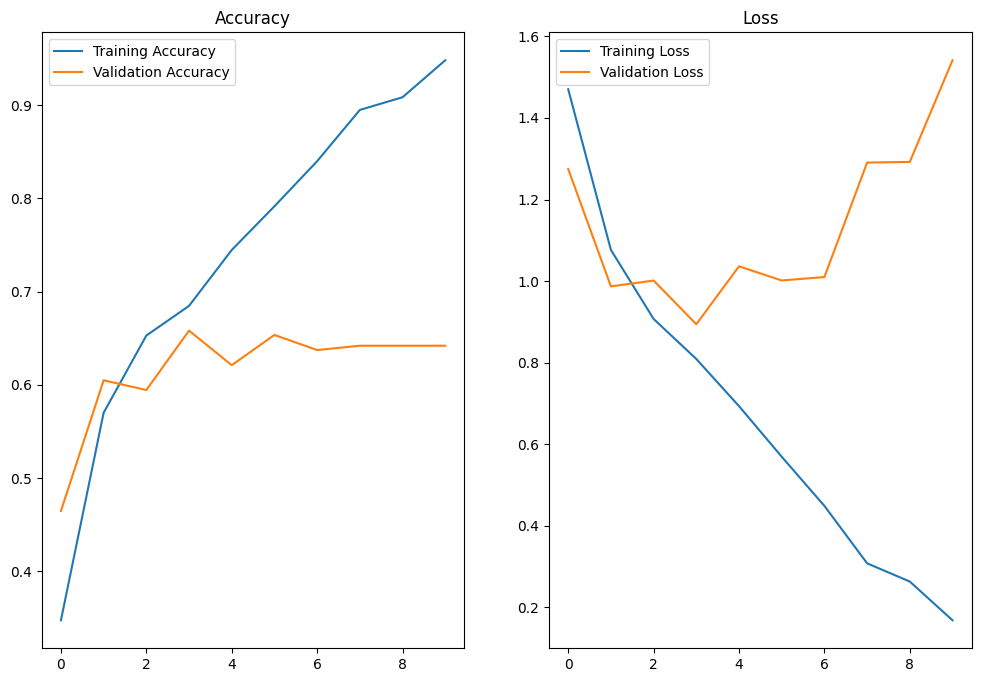

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(10)

plt.figure(figsize=(12, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='upper left')
plt.title('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper left')
plt.title('Loss')
plt.show()

So we can see it's overfit while val_los is increasing,train_los is decrease

# 6. DEAL WITH OVERFITTING

How to deal with overfitting ?

To combat overfitting in deep learning, we have several powerful techniques:

**Data Augmentation:** This artificially expands the training data by creating variations of existing data (e.g., rotating images, adding noise). This exposes the model to a wider range of scenarios, improving its ability to generalize to unseen data and reducing overfitting.

**Batch Normalization:** This stabilizes the training process by normalizing the activations of hidden layers, making the model less sensitive to initialization values and allowing for faster learning.

**Early Stopping:** This technique monitors the model's performance on a validation set. If the validation performance stops improving, training is halted to prevent the model from memorizing irrelevant details in the training data.

**Dropout:** This injects randomness by randomly dropping out neurons during training. This forces the model to learn robust features that are not dependent on any specific neuron, ultimately reducing overfitting.


See more techniques here : https://towardsdatascience.com/8-simple-techniques-to-prevent-overfitting-4d443da2ef7d

See detailed augmentation tutorial here : https://medium.com/ymedialabs-innovation/data-augmentation-techniques-in-cnn-using-tensorflow-371ae43d5be9

We will not be using data augmentation because it is increasing data and fit time, but you can try

# 6.1 DROPOUT - BATCH NORMALIZATION

In [ ]:
from tensorflow.keras.optimizers import Adam

In [ ]:
model = Sequential()


model.add(Conv2D(16, (3,3), padding='same', activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), padding='same', activation='relu'))
model.add(MaxPooling2D())
model.add(Dropout(0,2))
model.add(Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(128, (3,3), padding='same', activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(256, (3,3), padding='same', activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())
#ANN

model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0,2))
model.add(Dense(32, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.003),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])


In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 256, 256, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 128, 128, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 128, 128, 32)        │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 64, 64, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 32, 32, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 16, 16, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 8, 8, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 16384)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │       1,048,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 5)                   │             165 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,443,749 (5.51 MB)

 Trainable params: 1,443,621 (5.51 MB)

 Non-trainable params: 128 (512.00 B)

# 6.2 REDUCE LEARNING RATE

In [ ]:
batch_size=64

from keras.callbacks import ReduceLROnPlateau
red_lr= ReduceLROnPlateau(monitor='val_accuracy',patience=3,verbose=1,factor=0.1)

In [ ]:
class GetBestModel(tf.keras.callbacks.Callback):
    def __init__(self, monitor = "val_loss", verbose = 0, mode = "auto"):
        super(GetBestModel, self).__init__()
        self.monitor = monitor
        self.verbose = verbose
        self.mode = mode
        if self.mode == "min":
            self.best = np.Inf
        else:
            self.best = -np.Inf

    def on_epoch_end(self, epoch, logs=None):
        current = logs.get(self.monitor)
        if self.mode == "min" and current < self.best:
            self.best = current
            self.best_weights = self.model.get_weights()
        elif self.mode == "max" and current > self.best:
            self.best = current
            self.best_weights = self.model.get_weights()

    def on_train_end(self, logs=None):
        self.model.set_weights(self.best_weights)

In [ ]:
best_model = GetBestModel(monitor = "val_loss", mode = "min", verbose = 1)

# 6.3 EARLY STOPPING

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
early_stop = EarlyStopping(monitor='val_loss',patience=5)

In [ ]:
epochs = 25
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs,
  batch_size=batch_size,
  callbacks=[early_stop,red_lr,best_model]
)

Epoch 1/25
54/54 ━━━━━━━━━━━━━━━━━━━━ 16s 193ms/step - accuracy: 0.3255 - loss: 1.4968 - val_accuracy: 0.3082 - val_loss: 4.5849 - learning_rate: 0.0030
Epoch 2/25
54/54 ━━━━━━━━━━━━━━━━━━━━ 12s 94ms/step - accuracy: 0.5302 - loss: 1.1294 - val_accuracy: 0.4183 - val_loss: 2.3069 - learning_rate: 0.0030
Epoch 3/25
54/54 ━━━━━━━━━━━━━━━━━━━━ 5s 88ms/step - accuracy: 0.5977 - loss: 1.0051 - val_accuracy: 0.5261 - val_loss: 1.6627 - learning_rate: 0.0030
Epoch 4/25
54/54 ━━━━━━━━━━━━━━━━━━━━ 5s 97ms/step - accuracy: 0.6176 - loss: 0.9673 - val_accuracy: 0.4890 - val_loss: 1.3951 - learning_rate: 0.0030
Epoch 5/25
54/54 ━━━━━━━━━━━━━━━━━━━━ 10s 89ms/step - accuracy: 0.6290 - loss: 0.9366 - val_accuracy: 0.4948 - val_loss: 1.3227 - learning_rate: 0.0030
Epoch 6/25
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - accuracy: 0.6421 - loss: 0.8972
Epoch 6: ReduceLROnPlateau reducing learning rate to 0.00030000000260770325.
54/54 ━━━━━━━━━━━━━━━━━━━━ 5s 97ms/step - accuracy: 0.6421 - loss: 0.8973 - val

**BEST PRACTİCES :**

I have tried like too many values for each component, here what I see :
**For this spesific model;**

1. Increasing the model complexity without increasing regularization parameters, overfits too fast
2. Decreasing the model layers and add more neurons,underfits.
3. Increasing learning rate to over 0,05 overfits.
4. Using Data augmentation with high parameters such as : rotation_range(0.5), underfits.
5. When you add regularization layers in order to avoid overfitting in high-layer structers, overfits after 20th-25th epoch.

I had scores for accuracy for the best 0.82 train 0.73 test 2 days ago, for accidentally i didn't save that model,So you can get good scores with CNN too just do best practice.

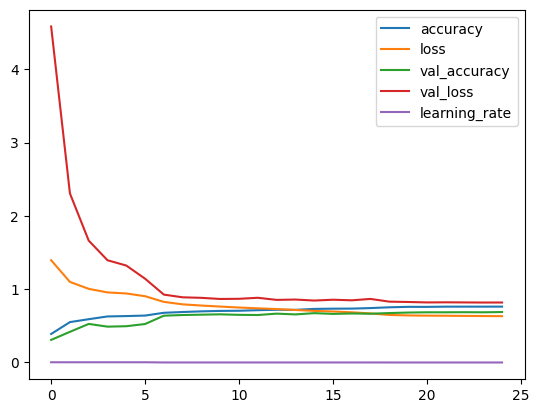

In [ ]:
pd.DataFrame(history.history).plot();

In [ ]:
model.save('my_trained_model.h5')

# 7. TRANSFER LEARNİNG

In [ ]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications import Xception

**Transfer Learning**

Transfer learning is a technique in deep learning where a pre-trained model on one task is leveraged to improve performance on a new, but related task. It's like having a seasoned student help a new student learn the ropes.

We use transfer learning because it offers several advantages:

**Faster Training:** Training a complex model from scratch can be time-consuming and require a massive amount of data. Transfer learning allows you to utilize the knowledge already captured in the pre-trained model, significantly reducing training time.
**Better Performance:** Pre-trained models are often trained on vast datasets, giving them a strong understanding of underlying concepts. By transferring this knowledge, you can achieve better results on your new task, even with a limited dataset.
**Reduced Resources:** Training complex models requires significant computational power. Transfer learning allows you to leverage the pre-trained model, reducing the computational resources needed for your new task.

**Overall**, transfer learning is a powerful tool that accelerates the development of machine learning models and improves their performance, making it a valuable technique in various applications.

# 7.1 Xception Model

See detailed source : https://www.tensorflow.org/api_docs/python/tf/keras/applications/Xception

In [ ]:
pretrained_model.output_shape
num_classes

5

In [ ]:
from tensorflow.keras.applications import Xception
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam
import tensorflow as tf


# Define input
input_tensor = Input(shape=(256, 256, 3))

# Load pre-trained Xception model without top layers
pretrained_model = Xception(include_top=False,
                            input_tensor=input_tensor,
                            pooling='avg',
                            weights='imagenet')

# Freeze the layers of the pre-trained model
for layer in pretrained_model.layers:
    layer.trainable = False

# Add ANN layers
x = pretrained_model.output
x = Dense(512, activation='relu')(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.2)(x)

# Final classification layer
output_tensor = Dense(num_classes, activation='softmax')(x)

# Define the model
Xception_model = Model(inputs=input_tensor, outputs=output_tensor)

# Compile the model
Xception_model.compile(optimizer=Adam(learning_rate=0.003),
                       loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                       metrics=['accuracy'])

# Print the summary of the model
Xception_model.summary()


Model: "functional_29"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_7             │ (None, 256, 256, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1_conv1 (Conv2D)     │ (None, 127, 127, 32)   │            864 │ input_layer_7[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1_conv1_bn           │ (None, 127, 127, 32)   │            128 │ block1_conv1[0][0]     │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1_conv1_act          │ (None, 127, 127, 32)   │              0 │ block1_conv1_bn[0][0]  │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1_conv2 (Conv2D)     │ (None, 125, 125, 64)   │         18,432 │ block1_conv1_act[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1_conv2_bn           │ (None, 125, 125, 64)   │            256 │ block1_conv2[0][0]     │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1_conv2_act          │ (None, 125, 125, 64)   │              0 │ block1_conv2_bn[0][0]  │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2_sepconv1           │ (None, 125, 125, 128)  │          8,768 │ block1_conv2_act[0][0] │
│ (SeparableConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2_sepconv1_bn        │ (None, 125, 125, 128)  │            512 │ block2_sepconv1[0][0]  │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2_sepconv2_act       │ (None, 125, 125, 128)  │              0 │ block2_sepconv1_bn[0]… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2_sepconv2           │ (None, 125, 125, 128)  │         17,536 │ block2_sepconv2_act[0… │
│ (SeparableConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2_sepconv2_bn        │ (None, 125, 125, 128)  │            512 │ block2_sepconv2[0][0]  │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_29 (Conv2D)        │ (None, 63, 63, 128)    │          8,192 │ block1_conv2_act[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2_pool               │ (None, 63, 63, 128)    │              0 │ block2_sepconv2_bn[0]… │
│ (MaxPooling2D)            │                        │                │                        │
├──────────────────────

 Total params: 22,175,789 (84.59 MB)

 Trainable params: 1,314,309 (5.01 MB)

 Non-trainable params: 20,861,480 (79.58 MB)

layer.trainable=False

**This code freezes the weights of all layers in the pre-trained model, preventing them from being updated during training.**

In [ ]:
Xception_model_results = Xception_model.fit(train_ds, epochs=25,
                             validation_data=val_ds,
                             callbacks=[early_stop])


Epoch 1/25
54/54 ━━━━━━━━━━━━━━━━━━━━ 102s 1s/step - accuracy: 0.6754 - loss: 0.8645 - val_accuracy: 0.8563 - val_loss: 0.4130
Epoch 2/25
54/54 ━━━━━━━━━━━━━━━━━━━━ 67s 416ms/step - accuracy: 0.8947 - loss: 0.2889 - val_accuracy: 0.8679 - val_loss: 0.3755
Epoch 3/25
54/54 ━━━━━━━━━━━━━━━━━━━━ 41s 416ms/step - accuracy: 0.9267 - loss: 0.2189 - val_accuracy: 0.8714 - val_loss: 0.4288
Epoch 4/25
54/54 ━━━━━━━━━━━━━━━━━━━━ 40s 406ms/step - accuracy: 0.9398 - loss: 0.1691 - val_accuracy: 0.8610 - val_loss: 0.4348
Epoch 5/25
54/54 ━━━━━━━━━━━━━━━━━━━━ 41s 405ms/step - accuracy: 0.9582 - loss: 0.1142 - val_accuracy: 0.8691 - val_loss: 0.4843
Epoch 6/25
54/54 ━━━━━━━━━━━━━━━━━━━━ 22s 413ms/step - accuracy: 0.9714 - loss: 0.0816 - val_accuracy: 0.8830 - val_loss: 0.5204
Epoch 7/25
54/54 ━━━━━━━━━━━━━━━━━━━━ 41s 409ms/step - accuracy: 0.9784 - loss: 0.0585 - val_accuracy: 0.8633 - val_loss: 0.5598


In [ ]:
Xception_model.save('Xception_trained_model.h5')

W0000 00:00:1715013500.327696     117 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update

These warnings are result of the XLA and JIT compile nuances in the background.You don't have to worry about.

Accelerated Linear Algebra(XLA)
Just In Time(JIT)

see detailed discussion : https://github.com/keras-team/keras/issues/19081

# 7.2 MobileNetV2 Model

See detailed source : https://www.tensorflow.org/api_docs/python/tf/keras/applications/mobilenet_v2

In [ ]:
early_stop = EarlyStopping(monitor='val_loss',patience=20) #increased the patience of early stoping

In [ ]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam
import tensorflow as tf

# Define the input shape explicitly
input_tensor = Input(shape=(256, 256, 3))

# Load pre-trained MobileNetV2 model without the top layers
pretrained_model = MobileNetV2(include_top=False,
                               input_tensor=input_tensor,
                               pooling='avg',  # Global average pooling is applied
                               weights='imagenet')

# Freeze the layers of the pre-trained model
for layer in pretrained_model.layers:
    layer.trainable = False

# Create the output of the pre-trained model
x = pretrained_model.output

# Add ANN layers
x = Dense(512, activation='relu')(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.2)(x)  # Correct dropout rate
x = Dense(32, activation='relu')(x)

# Final classification layer
output_tensor = Dense(num_classes, activation='softmax')(x)

# Define the full model
MobileNetV2_model = Model(inputs=input_tensor, outputs=output_tensor)

# Compile the model
MobileNetV2_model.compile(optimizer=Adam(learning_rate=0.003),
                          loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                          metrics=['accuracy'])

# Print the summary of the model
MobileNetV2_model.summary()


<ipython-input-53-cc9c3c160616>:11: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  pretrained_model = MobileNetV2(include_top=False,


Model: "functional_30"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_10            │ (None, 256, 256, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv1 (Conv2D)            │ (None, 128, 128, 32)   │            864 │ input_layer_10[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bn_Conv1                  │ (None, 128, 128, 32)   │            128 │ Conv1[0][0]            │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv1_relu (ReLU)         │ (None, 128, 128, 32)   │              0 │ bn_Conv1[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise   │ (None, 128, 128, 32)   │            288 │ Conv1_relu[0][0]       │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise_… │ (None, 128, 128, 32)   │            128 │ expanded_conv_depthwi… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise_… │ (None, 128, 128, 32)   │              0 │ expanded_conv_depthwi… │
│ (ReLU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_project     │ (None, 128, 128, 16)   │            512 │ expanded_conv_depthwi… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_project_BN  │ (None, 128, 128, 16)   │             64 │ expanded_conv_project… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand (Conv2D)   │ (None, 128, 128, 96)   │          1,536 │ expanded_conv_project… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand_BN         │ (None, 128, 128, 96)   │            384 │ block_1_expand[0][0]   │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand_relu       │ (None, 128, 128, 96)   │              0 │ block_1_expand_BN[0][… │
│ (ReLU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_pad               │ (None, 129, 129, 96)   │              0 │ block_1_expand_relu[0… │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_depthwise         │ (None, 64, 64, 96)     │            864 │ block_1_pad[0][0]      │
│ (DepthwiseConv2D)         │                        │                │                        │
├──────────────────────

 Total params: 3,053,573 (11.65 MB)

 Trainable params: 795,589 (3.03 MB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [ ]:
MobileNetV2_model_results = MobileNetV2_model.fit(train_ds, epochs=50,
                             validation_data=val_ds,
                             callbacks=[early_stop])

Epoch 1/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 43s 485ms/step - accuracy: 0.5972 - loss: 1.0006 - val_accuracy: 0.8575 - val_loss: 0.3994
Epoch 2/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 10s 99ms/step - accuracy: 0.8811 - loss: 0.3324 - val_accuracy: 0.8644 - val_loss: 0.3916
Epoch 3/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 6s 104ms/step - accuracy: 0.9260 - loss: 0.2102 - val_accuracy: 0.8621 - val_loss: 0.4664
Epoch 4/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 6s 102ms/step - accuracy: 0.9410 - loss: 0.1718 - val_accuracy: 0.8957 - val_loss: 0.3870
Epoch 5/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 6s 115ms/step - accuracy: 0.9603 - loss: 0.1144 - val_accuracy: 0.8830 - val_loss: 0.3950
Epoch 6/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 5s 101ms/step - accuracy: 0.9736 - loss: 0.0702 - val_accuracy: 0.8806 - val_loss: 0.4454
Epoch 7/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 10s 96ms/step - accuracy: 0.9834 - loss: 0.0535 - val_accuracy: 0.8528 - val_loss: 0.6152
Epoch 8/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 5s 99ms/step - accuracy: 0.9718 - loss: 0.0734 - val_accuracy: 0.

In [ ]:
MobileNetV2_model.save('MobileNetV2_trained_model.h5')

# 8. COMPARISON - VISUALIZE THE TRAINING RESULTS

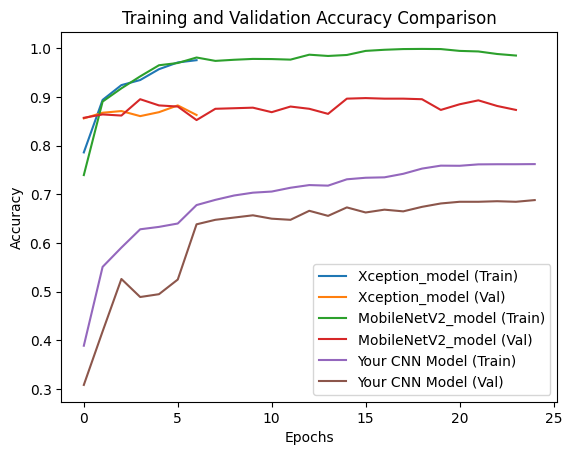

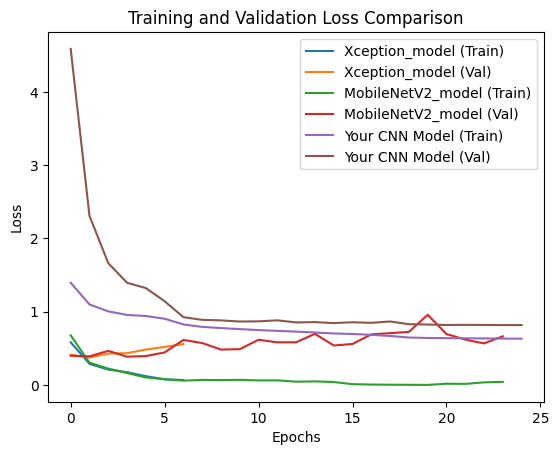

In [ ]:

# Plotting accuracy
plt.plot(Xception_model_results.history['accuracy'], label='Xception_model (Train)')
plt.plot(Xception_model_results.history['val_accuracy'], label='Xception_model (Val)')
plt.plot(MobileNetV2_model_results.history['accuracy'], label='MobileNetV2_model (Train)')
plt.plot(MobileNetV2_model_results.history['val_accuracy'], label='MobileNetV2_model (Val)')
plt.plot(history.history['accuracy'], label='Your CNN Model (Train)')
plt.plot(history.history['val_accuracy'], label='Your CNN Model (Val)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy Comparison')
plt.legend()
plt.show()

# Plotting loss
plt.plot(Xception_model_results.history['loss'], label='Xception_model (Train)')
plt.plot(Xception_model_results.history['val_loss'], label='Xception_model (Val)')
plt.plot(MobileNetV2_model_results.history['loss'], label='MobileNetV2_model (Train)')
plt.plot(MobileNetV2_model_results.history['val_loss'], label='MobileNetV2_model (Val)')
plt.plot(history.history['loss'], label='Your CNN Model (Train)')
plt.plot(history.history['val_loss'], label='Your CNN Model (Val)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Comparison')
plt.legend()
plt.show()


# 9. CONCLUSION

MobileNetV2 demonstrates superior performance with a training accuracy of 0.99 and a testing accuracy of 0.90,
followed closely by Xception with a training accuracy of 0.99 and a testing accuracy of 0.87.

In contrast, a custom CNN model achieves a training accuracy of 0.64 and a testing accuracy of 0.58.
Despite similar training accuracies between MobileNetV2 and Xception, MobileNetV2's superior testing accuracy highlights its effectiveness in generalizing to new data.

**This comparison underscores the power of transfer learning, where pre-trained models like MobileNetV2 and Xception leverage knowledge from extensive datasets to improve performance on specific tasks. Transfer learning not only enhances accuracy but also reduces training time and resource requirements, making it a valuable technique for developing robust and efficient machine learning models.**







See all transfer learning models : https://www.tensorflow.org/api_docs/python/tf/keras/applications/

See my friends notebook about all the models : https://www.kaggle.com/code/adnanyaramis/flower-recognition

See different CNN Approach : https://www.kaggle.com/code/rajmehra03/flower-recognition-cnn-keras

See a tutorial about Transfer Learning : https://www.kaggle.com/code/rajmehra03/a-comprehensive-guide-to-transfer-learning#3-)

# MY OTHER WORKS

Do not hesitate to check my previous and future works : https://www.kaggle.com/eneskosar19/code